In [9]:
# Run in bioconda environment

#Import helpful packages
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from Bio import SeqIO
from Bio.Seq import Seq
import random

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Helvetica'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.linewidth'] = 0.5
matplotlib.rcParams['xtick.major.width'] = 0.5
matplotlib.rcParams['ytick.major.width'] = 0.5

matplotlib.rcParams['patch.force_edgecolor'] = True
matplotlib.rcParams['patch.linewidth'] = 0.5


# Figure S4B

In [2]:
# random ORF generator that preserves biases from conservation of -35, -10, ACA, and RBS

bases = 'ATGC'
codons = [a+b+c for a in bases for b in bases for c in bases]
# no stop codons:
codons.pop(codons.index('TAA'))
codons.pop(codons.index('TAG'))
codons.pop(codons.index('TGA'))


def random_orf_ccDNA_like(codons):
    orf = ['ATG']
    for _ in range(21):
        orf.append(random.choice(codons))
    orf.append(random.choice('ATGC'))
    # -35 sequence:
    orf.append('TTGACA')
    # then 3 random bases:
    orf.append(random.choice('ATGC'))
    orf.append(random.choice('ATGC'))
    orf.append(random.choice('ATGC'))
    # then the repeat junction (reverse complement)
    orf.append('TGTTA')
    # 3 more codons:
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    # -10 sequence:
    orf.append('TATAAT')
    # 5 more codons:
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    # RBS:
    orf.append('GAG')
    # two more codons then done, for a full 120bp of codons
    orf.append(random.choice(codons))
    orf.append(random.choice(codons))
    return ''.join(orf)
# for example:
random_orf_ccDNA_like(codons)

'ATGTTGACGTCTATGAGAGAAGCCATCTACGGTTGTTTTCATTGCAACCCCGCTGCTACGAATGGTTTTGACATAATGTTACATTTGTGCTATAATCTGAGGCCTCGAGAAGAGTTAGCG'

In [11]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
Neo_hydrophobicities = []
randomORF_hydrophobicities = []

gravy = { 'Neo':[], 'random':[]}
pI = { 'Neo':[], 'random':[]}
helix = { 'Neo':[], 'random':[]}
sheet = { 'Neo':[], 'random':[]}


for record in SeqIO.parse("Neo_ORF_sequences.fasta", "fasta"):
    protein_sequence = str.upper(str(record.seq))
    random_sequence = Seq(random_orf_ccDNA_like(codons)*20).translate()
    
    X = ProteinAnalysis(protein_sequence)
    Y = ProteinAnalysis(random_sequence)

    gravy['Neo'].append(X.gravy())
    gravy['random'].append(Y.gravy())

    pI['Neo'].append(X.isoelectric_point())
    pI['random'].append(Y.isoelectric_point())

    helix['Neo'].append(X.secondary_structure_fraction()[0])
    helix['random'].append(Y.secondary_structure_fraction()[0])

    sheet['Neo'].append(X.secondary_structure_fraction()[1])
    sheet['random'].append(Y.secondary_structure_fraction()[1])


/var/folders/vv/kngv3zyj4vv7y3x73yx3cqn40000gn/T/ipykernel_40739/4015356667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neo','random'])
/var/folders/vv/kngv3zyj4vv7y3x73yx3cqn40000gn/T/ipykernel_40739/4015356667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neo','random'])
/var/folders/vv/kngv3zyj4vv7y3x73yx3cqn40000gn/T/ipykernel_40739/4015356667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neo','random'])
/var/folders/vv/kngv3zyj4vv7y3x73yx3cqn40000gn/T/ipykernel_40739/4015356667.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Neo','random'])


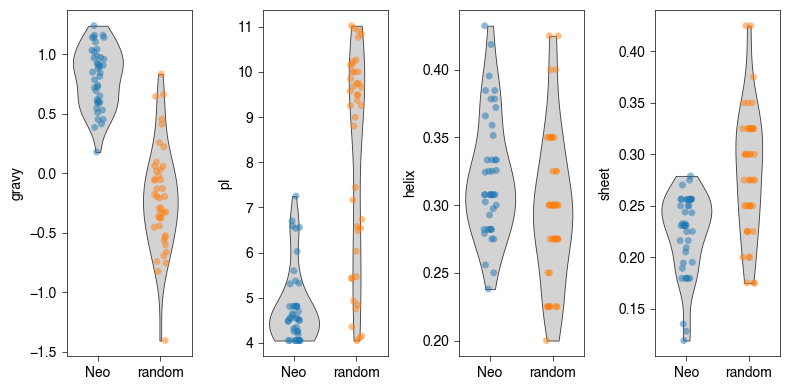

In [12]:
fig, axs = plt.subplots(figsize=(8,4),ncols=4)

categories = [gravy, pI, helix, sheet]
category_names = ['gravy', 'pI', 'helix', 'sheet']

for n,category in enumerate(categories):
    y = (category['Neo'], category['random'])
    ax = axs[n]
    sns.violinplot(ax=ax, data=y, inner=None, color='lightgray', cut=0)
    sns.stripplot(ax=ax, data=y, jitter=True, alpha=0.5)  # Strip plot
    ax.set_xticklabels(['Neo','random'])

    ax.set_ylabel(f'{category_names[n]}')
fig.tight_layout()
plt.savefig("FigS4B.pdf")